#  Assisting children while biking

### Gruppe 7: Maximilian Hörnis, Florian Schwarm, Dennis Rupprecht

## Motivation 
- Children are active participants in road traffic
- Traffic signs might not be obvious to them
- Handheld technology device (smartphones etc.) usage is prevalent among children 

## Idea

Recognize and classify traffic signs automatically and display them in
an easy to understand assistive technology for children, without distracting them.

## Task


* Create selection from traffic signs
*   Recognize a stop sign



In [0]:
# Import some libs
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
font = cv2.FONT_HERSHEY_COMPLEX
from google.colab.patches import cv2_imshow

In [16]:

img = cv2.imread("stopsign2.png")
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the colors. We are looking for the colors between [224, 27, 34](color img) and [227, 30, 36](color img2)
#lower = np.array([178, 34, 34], dtype = "uint8")
#upper = np.array([228, 113, 120], dtype = "uint8")

lower = np.array([155,25,0])
upper = np.array([179,255,255])
# inRange now looking in the picture between the both colors
mask = cv2.inRange(img, lower, upper)

#plt.axis("off")
#plt.imshow(mask)

# bitwise_and show only the selected origin colors. Other colors are black
output = cv2.bitwise_and(img, img, mask = mask)
plt.axis("off")
plt.imshow(output)
#plt.imshow(img)
imask = mask>0
green = np.zeros_like(img, np.uint8)
green[imask] = img[imask]

## save 
cv2.imwrite("green.png", green)



error: ignored

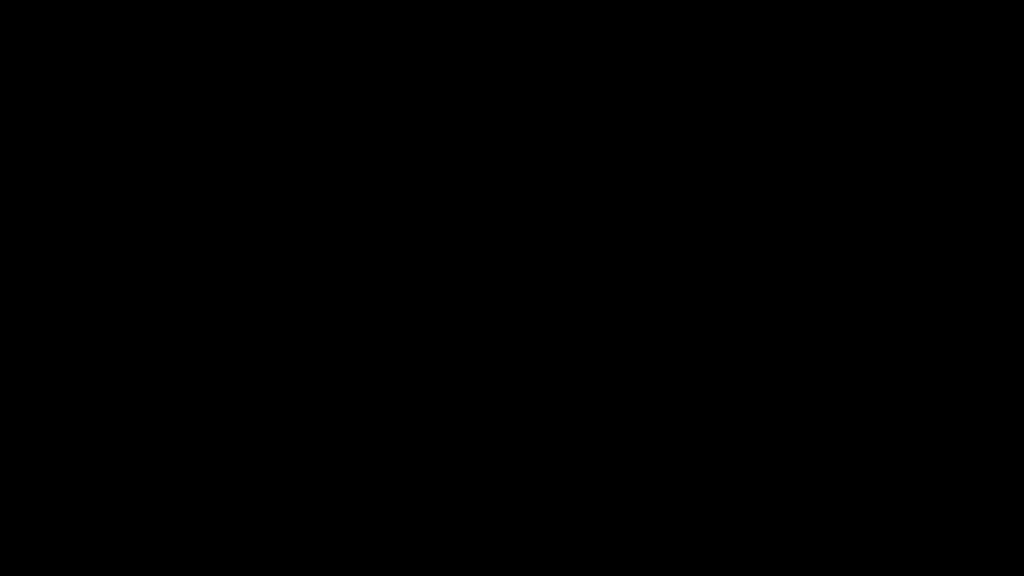

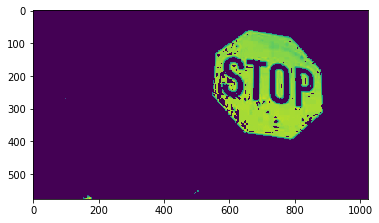

In [0]:


img = cv2.imread("green.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, threshold = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)
_, contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
    cv2.drawContours(img, [approx], 0, (0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1]
    if len(approx)==8:
        print("stop sign")
        cv2.drawContours(img,[cnt],0,(255,255,0),-1)


plt.imshow(gray)
cv2_imshow(threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()
    







